## ch7. regression
https://docs.google.com/presentation/d/19CklQgi7bguRQgWxAtdOiiDvj_9kQ2d0awpBUrMbTnY/edit?usp=sharing

### 회귀를 이용한 주택 가격 예상

In [2]:
#-*- coding: utf-8 -*-

# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

boston = load_boston()

# 방 개수는 5번째다
fig,ax = plt.subplots()
ax.scatter(boston.data[:, 5], boston.target)
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")

x = boston.data[:, 5]
# 다음은 입력으로 2차원을 사용하기 때문에 2차원을 만들기 위해 np.atleast_2d을 사용한다.
# 입력 형태를 맞추기 위해 전치한다:
x = np.transpose(np.atleast_2d(x))

y = boston.target

lr = LinearRegression(fit_intercept=False)
lr.fit(x, y)
print('선형회귀 직선의 방정식 : y = {}x + {}'.format(lr.coef_, lr.intercept_))

# 단순히 x 값의 출력범위에 따라 차트가 다르게 보임을 테스트하는 과정
xmin = 0
xmax = boston.data[:, 5].max() + 1
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), '-', lw=4)
fig.savefig('Figure1.png')

mse = mean_squared_error(y, lr.predict(x))
rmse = np.sqrt(mse)
print('RMSE (no intercept): {}'.format(rmse))

# 이번에는 절편을 적합화한다
lr = LinearRegression(fit_intercept=True)

lr.fit(x, y)
print('선형회귀 직선의 방정식 : y = {}x + {}'.format(lr.coef_, lr.intercept_))

fig,ax = plt.subplots()
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")
ax.scatter(boston.data[:, 5], boston.target)
xmin = x.min()
xmax = x.max()
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]) , '-', lw=4)
fig.savefig('Figure2.png')

mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (of training data): {:.3}".format(mse))

rmse = np.sqrt(mse)
print("Root mean squared error (of training data): {:.3}".format(rmse))
print("대략적인 신뢰구간을 얻기 위해 RMSE의 두 배 {} 달러 정도가 실제 값과 추정 값과의 차이.".format(rmse * 2.0 * 1000))

cod = r2_score(y, lr.predict(x))
print('COD (on training data): {:.2}'.format(cod))

선형회귀 직선의 방정식 : y = [ 3.6533504]x + 0.0
RMSE (no intercept): 7.64268509309
선형회귀 직선의 방정식 : y = [ 9.10210898]x + -34.6706207764
Mean squared error (of training data): 43.6
Root mean squared error (of training data): 6.6
대략적인 신뢰구간을 얻기 위해 RMSE의 두 배 13206.1427784 달러 정도가 실제 값과 추정 값과의 차이.
COD (on training data): 0.48


### L1 벌점과 L2 벌점

선형회귀 직선의 방정식 : y = [ 9.10210898]x + -34.6706207764
LASSO 직선의 방정식 : y = [ 7.07245664]x + -21.9149978647


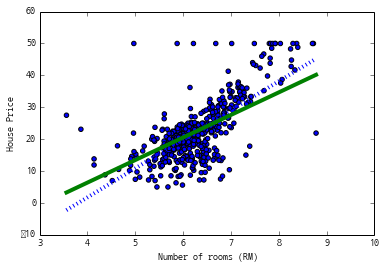

In [86]:
#-*- coding: utf-8 -*-

# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

from sklearn.linear_model import LinearRegression, Lasso
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

boston = load_boston()
fig, ax = plt.subplots()
ax.scatter(boston.data[:, 5], boston.target)
ax.set_xlabel("Number of rooms (RM)")
ax.set_ylabel("House Price")

x = boston.data[:, 5]
xmin = x.min()
xmax = x.max()
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
print('선형회귀 직선의 방정식 : y = {}x + {}'.format(lr.coef_, lr.intercept_))

ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), ':', lw=4, label='OLS model')

las = Lasso()
las.fit(x, y)
print('LASSO 직선의 방정식 : y = {}x + {}'.format(las.coef_, las.intercept_))

ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', lw=4, label='Lasso model')
fig.savefig('Figure3.png')

### sklearn 라이브러리의 LinearRegression 활용한 회귀예제

x.values[  6.32000000e-03   1.80000000e+01   2.31000000e+00], shape(506, 13), ndim(2)
y.values[ 24.   21.6  34.7], shape(506,), ndim(1)
기울기를 확인:[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
RMSE: 4.67950630064


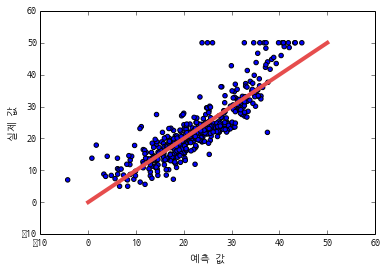

In [80]:
#-*- coding: utf-8 -*-

# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

# 이 스크립트는 단순한 (일반) 선형 회귀의 예제를 보인다

import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

boston = load_boston()
x = boston.data
y = boston.target

# 데이터의 생김새를 보자
print('x.values{}, shape{}, ndim({})'.format(x[0][:3], x.shape, x.ndim))
print('y.values{}, shape{}, ndim({})'.format(y[:3], y.shape, y.ndim))

# 모델 적합화는 반드시 필요하다: LinearRegression의 `fit`를 호출한다:
lr = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lr.fit(x, y)
print('기울기를 확인:{}'.format(lr.coef_))

# 인스턴스의 `residues_`에는 제곱된 잔차 합이 있다
rmse = np.sqrt(lr.residues_/len(x))
print('RMSE: {}'.format(rmse))

plt.rc('font', family='NanumGothicCoding')
fig, ax = plt.subplots()
# 대각선을 그린다(참조)
ax.plot([0, 50], [0, 50], '-', color=(.9,.3,.3), lw=4)

# 실제 값과 예측 값을 그린다:
ax.scatter(lr.predict(x), boston.target)

ax.set_xlabel(unicode('예측 값', 'utf-8'))
ax.set_ylabel(unicode('실제 값', 'utf-8'))
fig.savefig('Figure_07_08.png')

### Numpy 라이브러리의 linalg.lstsq 선형회귀 예제

Residual: 4.67950630064


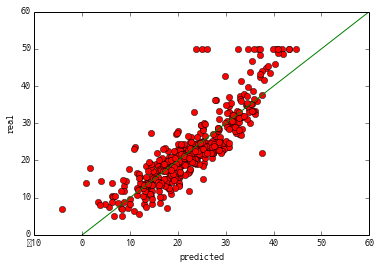

In [69]:
#-*- coding: utf-8 -*-

# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

# 이 스크립트는 단순한 (일반) 선형 회귀의 예제를 보인다

import numpy as np
from sklearn.datasets import load_boston
import pylab as plt

boston = load_boston()
x = np.array([np.concatenate((v, [1])) for v in boston.data])
y = boston.target

# np.linal.lstsq implements least-squares linear regression
s, total_error, _, _ = np.linalg.lstsq(x, y)

rmse = np.sqrt(total_error[0] / len(x))
print('Residual: {}'.format(rmse))

# 실제 값과 예측 값을 그린다:
plt.plot(np.dot(x, s), boston.target, 'ro')

# 대각선을 그린다(참조)
plt.plot([0, 60], [0, 60], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()


### 다차원 회귀

선형회귀 직선의 방정식 : y = [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]x + 36.4911032804
RMSE: 4.7.
R2: 0.74.


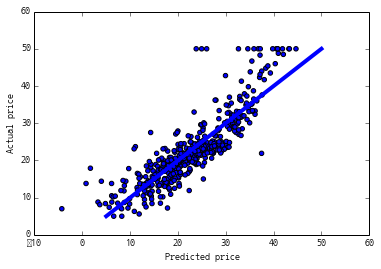

In [93]:
#-*- coding: utf-8 -*-

# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

# 이 스크립트는 OLS 회귀를 사용하여 보스턴 데이터셋에 대해 예측 값-실제 값을 그린다

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

boston = load_boston()

x = boston.data
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
print('선형회귀 다차원 방정식 : y = {} + {}'.format(lr.coef_, lr.intercept_))

p = lr.predict(x)
print("RMSE: {:.2}.".format(np.sqrt(mean_squared_error(y, p))))
print("R2: {:.2}.".format(lr.score(x, y)))
fig,ax = plt.subplots()
ax.scatter(p, y)
ax.set_xlabel('Predicted price')
ax.set_ylabel('Actual price')
ax.plot([y.min(), y.max()], [y.min(), y.max()], lw=4)

fig.savefig('Figure4.png')

### 라소 패스 시각화

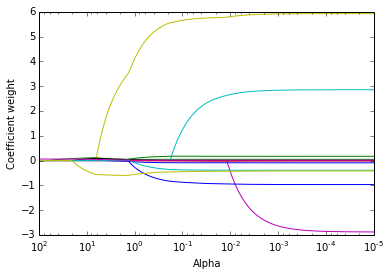

In [43]:
#-*- coding: utf-8 -*-

# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
import numpy as np

boston = load_boston()
x = boston.data
y = boston.target

las = Lasso(normalize=1)

from sklearn.linear_model import lasso_path
# help(lasso_path)

# numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
alphas = np.logspace(-5, 2, 1000)
alphas, coefs, _ = lasso_path(x, y, alphas=alphas, return_models=False, normalize=1, fit_intercept=False)

fig,ax = plt.subplots()
ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(alphas.max(), alphas.min())
ax.set_xlabel('Lasso coefficient path as a function of alpha')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficient weight')
fig.savefig('Figure_LassoPath.png')

### 회귀를 위한 교차 검증 & 벌점화 또는 정규화 회귀

In [92]:
#-*- coding: utf-8 -*-

# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

# This script fits several forms of penalized regression

from __future__ import print_function
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target

for name, met in [
        ('linear regression', LinearRegression()),
        ('lasso()', Lasso()),
        ('elastic-net(.5)', ElasticNet(alpha=0.5)),
        ('lasso(.5)', Lasso(alpha=0.5)),
        ('ridge(.5)', Ridge(alpha=0.5)),
]:
    # 전체 데이터를 적합화한다
    met.fit(x, y)

    # 전체 데이터에 대해 예측한다
    p = met.predict(x)
    r2_train = r2_score(y, p)

    # 일반 오차를 측정하기 위해 10 중첩 교차 검증을 사용한다
    kf = KFold(len(x), n_folds=10)
    p = np.zeros_like(y)
    for train, test in kf:
        met.fit(x[train], y[train])
        p[test] = met.predict(x[test])

    r2_cv = r2_score(y, p)
    print('Method: {}'.format(name))
    print('R2 on training: {}'.format(r2_train))
    print('R2 on 10-fold CV: {}'.format(r2_cv))
    print()
    print()

Method: linear regression
R2 on training: 0.740607742865
R2 on 10-fold CV: 0.590177393332


Method: lasso()
R2 on training: 0.682549461751
R2 on 10-fold CV: 0.592133161997


Method: elastic-net(.5)
R2 on training: 0.705578246881
R2 on 10-fold CV: 0.644543745277


Method: lasso(.5)
R2 on training: 0.713950619704
R2 on 10-fold CV: 0.610149856821


Method: ridge(.5)
R2 on training: 0.739919756984
R2 on 10-fold CV: 0.595606317968




### P가 N보다 큰 시나리오 & 텍스트 기반의 예제

In [3]:
#-*- coding: utf-8 -*-

# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 데이터 로드:
data, target = load_svmlight_file('data/E2006.train')

lr = LinearRegression()

# 완벽한 score를 구하기 위해 설명할 수 있는 훈련 데이터에 대해 오차 계산

lr.fit(data, target)
pred = lr.predict(data)

print('RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on training, {:.2}'.format(r2_score(target, pred)))
print('')

pred = np.zeros_like(target)
kf = KFold(len(target), n_folds=5)
for train, test in kf:
    lr.fit(data[train], target[train])
    pred[test] = lr.predict(data[test])

print('RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

KeyboardInterrupt: 

RMSE on training, 0.0025
R2 on training, 1.0

RMSE on testing (5 fold), 0.75
R2 on testing (5 fold), -0.42

### 원칙적으로 하이퍼 매개변수 설정하기

In [ ]:
#!/usr/bin/env python -W ignore::DeprecationWarning
#-*- coding: utf-8 -*-

# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

data, target = load_svmlight_file('data/E2006.train')

# 다음을 변경한다
# from sklearn.linear_model import Lasso
# met = Lasso(alpha=0.1)
met = ElasticNet(alpha=0.1)

kf = KFold(len(target), n_folds=5)
pred = np.zeros_like(target)
for train, test in kf:
    met.fit(data[train], target[train])
    pred[test] = met.predict(data[test])

print('[EN 0.1] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN 0.1] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))
print('')

# ElasticNetCV 생성자(모든 CPU 사용)
met = ElasticNetCV(n_jobs=-1)

kf = KFold(len(target), n_folds=5)
pred = np.zeros_like(target)
for train, test in kf:
    met.fit(data[train], target[train])
    pred[test] = met.predict(data[test])

print('[EN CV] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))
print('')

met.fit(data, target)
pred = met.predict(data)
print('[EN CV] RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on training, {:.2}'.format(r2_score(target, pred)))


# ElasticNetCV 생성자(모든 CPU 사용)
met = ElasticNetCV(n_jobs=-1, l1_ratio=[.01, .05, .25, .5, .75, .95, .99])

kf = KFold(len(target), n_folds=5)
pred = np.zeros_like(target)
for train, test in kf:
    met.fit(data[train], target[train])
    pred[test] = met.predict(data[test])


print('[EN CV l1_ratio] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV l1_ratio] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))
print('')


fig, ax = plt.subplots()
y = target
ax.scatter(y, pred, c='k')
ax.plot([-5,-1], [-5,-1], 'r-', lw=2)
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
fig.savefig('Figure_10k_scatter_EN_l1_ratio.png')

[EN 0.1] RMSE on testing (5 fold), 0.4
[EN 0.1] R2 on testing (5 fold), 0.61

[EN CV] RMSE on testing (5 fold), 0.37
[EN CV] R2 on testing (5 fold), 0.65

[EN CV] RMSE on training, 0.37
    [EN CV] R2 on training, 0.65
^CTraceback (most recent call last):
  File "2.py", line 63, in <module>
    met.fit(data[train], target[train])
  File "/Library/Python/2.7/site-packages/sklearn/linear_model/coordinate_descent.py", line 979, in fit
    for l1_ratio in l1_ratios for train, test in folds
  File "/Library/Python/2.7/site-packages/sklearn/externals/joblib/parallel.py", line 519, in __call__
    self.retrieve()
  File "/Library/Python/2.7/site-packages/sklearn/externals/joblib/parallel.py", line 433, in retrieve
    raise exception
KeyboardInterrupt


[EN 0.1] RMSE on testing (5 fold), 0.41
[EN 0.1] R2 on testing (5 fold), 0.61

[EN CV] RMSE on testing (5 fold), 0.38
[EN CV] R2 on testing (5 fold), 0.65

[EN CV] RMSE on training, 0.38
[EN CV] R2 on training, 0.66
[EN CV l1_ratio] RMSE on testing (5 fold), 0.38
[EN CV l1_ratio] R2 on testing (5 fold), 0.65